In [2]:
import tensorflow as tf
from tensorflow import keras

In [3]:
fashion_mnist = keras.datasets.fashion_mnist
(X_train_full, y_train_full), (X_test, y_test) = fashion_mnist.load_data()


In [9]:
X_train_full.shape


(60000, 28, 28)

In [10]:
X_train_full.dtype

dtype('uint8')

In [14]:
X_train_full[:3]

array([[[0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        ...,
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0]],

       [[0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        ...,
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0]],

       [[0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        ...,
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0]]], dtype=uint8)

In [4]:
X_valid, X_train = X_train_full[:5000]/255.0, X_train_full[5000:]/250.0
y_valid, y_train = y_train_full[:5000], y_train_full[5000:]
X_test = X_test/255.0

y_train[:5]

array([4, 0, 7, 9, 9], dtype=uint8)

In [5]:
class_names = ["T-shirt/top", "Trouser", "Pullover", "Dress", "Coat", "Sandal", "Shirt", "Sneaker", "Bag", "Ankle boot"]

Build a neural network

In [6]:
model = keras.models.Sequential()
model.add(keras.layers.Flatten(input_shape=[28,28]))
model.add(keras.layers.Dense(300, activation="relu"))
model.add(keras.layers.Dense(100, activation="relu"))
model.add(keras.layers.Dense(10, activation="softmax"))
model.summary()



Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
flatten (Flatten)            (None, 784)               0         
_________________________________________________________________
dense (Dense)                (None, 300)               235500    
_________________________________________________________________
dense_1 (Dense)              (None, 100)               30100     
_________________________________________________________________
dense_2 (Dense)              (None, 10)                1010      
Total params: 266,610
Trainable params: 266,610
Non-trainable params: 0
_________________________________________________________________


In [7]:
weights, biases = model.layers[1].get_weights()
weights

array([[-0.01638754,  0.00367582, -0.01459641, ...,  0.04535779,
        -0.03260883,  0.0134571 ],
       [ 0.01576514, -0.00238253,  0.00498734, ..., -0.07420452,
        -0.06352367, -0.05727936],
       [ 0.01356111, -0.07128028, -0.023754  , ..., -0.0620314 ,
         0.06529616,  0.01336639],
       ...,
       [ 0.02523454,  0.06375659,  0.05394919, ...,  0.03653277,
         0.02494219, -0.05073989],
       [ 0.04577293,  0.00075749,  0.03723773, ...,  0.05567886,
        -0.04699676, -0.0416745 ],
       [-0.05454993,  0.03534725,  0.07080065, ..., -0.06095415,
        -0.03741657, -0.03234646]], dtype=float32)

In [8]:
model.compile(loss="sparse_categorical_crossentropy", optimizer="sgd", metrics=["accuracy"])

In [23]:
history = model.fit(X_train,y_train,epochs=30, validation_data=(X_valid,y_valid))

Epoch 1/30
1719/1719 [==============================] - 3s 2ms/step - loss: 0.7240 - accuracy: 0.7583 - val_loss: 0.5413 - val_accuracy: 0.8180
Epoch 2/30
1719/1719 [==============================] - 3s 2ms/step - loss: 0.4883 - accuracy: 0.8296 - val_loss: 0.4539 - val_accuracy: 0.8432
Epoch 3/30
1719/1719 [==============================] - 2s 1ms/step - loss: 0.4396 - accuracy: 0.8465 - val_loss: 0.4078 - val_accuracy: 0.8642
Epoch 4/30
1719/1719 [==============================] - 2s 1ms/step - loss: 0.4144 - accuracy: 0.8558 - val_loss: 0.4019 - val_accuracy: 0.8644
Epoch 5/30
1719/1719 [==============================] - 2s 1ms/step - loss: 0.3933 - accuracy: 0.8622 - val_loss: 0.3837 - val_accuracy: 0.8676
Epoch 6/30
1719/1719 [==============================] - 2s 1ms/step - loss: 0.3786 - accuracy: 0.8669 - val_loss: 0.3861 - val_accuracy: 0.8642
Epoch 7/30
1719/1719 [==============================] - 2s 1ms/step - loss: 0.3651 - accuracy: 0.8712 - val_loss: 0.3949 - val_accuracy:

<function matplotlib.pyplot.show(*args, **kw)>

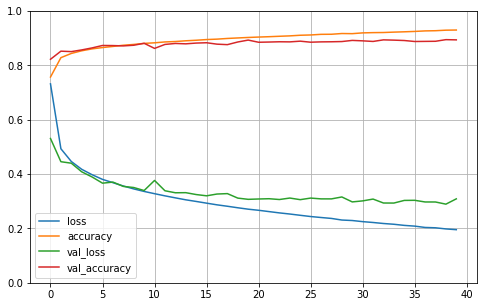

In [16]:
import pandas as pd
import matplotlib.pyplot as plt

pd.DataFrame(history.history).plot(figsize=(8,5))
plt.grid(True)
plt.gca().set_ylim(0,1)
plt.show

In [9]:
history = model.fit(X_train,y_train,epochs=40, validation_data=(X_valid,y_valid))

Epoch 1/40
1719/1719 [==============================] - 3s 2ms/step - loss: 0.7319 - accuracy: 0.7571 - val_loss: 0.5310 - val_accuracy: 0.8224
Epoch 2/40
1719/1719 [==============================] - 3s 1ms/step - loss: 0.4932 - accuracy: 0.8284 - val_loss: 0.4455 - val_accuracy: 0.8522
Epoch 3/40
1719/1719 [==============================] - 2s 1ms/step - loss: 0.4463 - accuracy: 0.8438 - val_loss: 0.4401 - val_accuracy: 0.8506
Epoch 4/40
1719/1719 [==============================] - 3s 1ms/step - loss: 0.4176 - accuracy: 0.8536 - val_loss: 0.4084 - val_accuracy: 0.8568
Epoch 5/40
1719/1719 [==============================] - 3s 2ms/step - loss: 0.3976 - accuracy: 0.8607 - val_loss: 0.3893 - val_accuracy: 0.8642
Epoch 6/40
1719/1719 [==============================] - 3s 1ms/step - loss: 0.3805 - accuracy: 0.8655 - val_loss: 0.3665 - val_accuracy: 0.8732
Epoch 7/40
1719/1719 [==============================] - 2s 1ms/step - loss: 0.3684 - accuracy: 0.8696 - val_loss: 0.3705 - val_accuracy:

In [10]:
model.evaluate(X_test,y_test)

313/313 [==============================] - 0s 1ms/step - loss: 0.3369 - accuracy: 0.8803


[0.3368668556213379, 0.880299985408783]

In [11]:
X_new = X_test[:3]
y_proba = model.predict(X_new)
y_proba.round(2)

array([[0.  , 0.  , 0.  , 0.  , 0.  , 0.01, 0.  , 0.02, 0.  , 0.97],
       [0.  , 0.  , 0.99, 0.  , 0.01, 0.  , 0.  , 0.  , 0.  , 0.  ],
       [0.  , 1.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  ]],
      dtype=float32)

In [17]:
import numpy as np
y_pred = model.predict_classes(X_new)
np.array(class_names)[y_pred]

array(['Ankle boot', 'Pullover', 'Trouser'], dtype='<U11')

## Building Regression MLP

In [ ]:
from sklearn.datasets import fetch_california_housing
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

In [18]:
from sklearn.datasets import fetch_california_housing
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

housing = fetch_california_housing()

X_train_full, X_test, y_train_full, y_test = train_test_split(housing.data, housing.target, random_state=42)
X_train, X_valid, y_train, y_valid = train_test_split(X_train_full, y_train_full, random_state=42)

scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_valid = scaler.transform(X_valid)
X_test = scaler.transform(X_test)

In [19]:
np.random.seed(42)
tf.random.set_seed(42)

model = keras.models.Sequential([
    keras.layers.Dense(30, activation="relu", input_shape=X_train.shape[1:]),
    keras.layers.Dense(1)
])
model.compile(loss="mean_squared_error", optimizer=keras.optimizers.SGD(lr=1e-3))
history = model.fit(X_train, y_train, epochs=20, validation_data=(X_valid, y_valid))
mse_test = model.evaluate(X_test, y_test)

Epoch 1/20
363/363 [==============================] - 0s 1ms/step - loss: 1.6419 - val_loss: 0.8560
Epoch 2/20
363/363 [==============================] - 0s 823us/step - loss: 0.7047 - val_loss: 0.6531
Epoch 3/20
363/363 [==============================] - 0s 810us/step - loss: 0.6345 - val_loss: 0.6099
Epoch 4/20
363/363 [==============================] - 0s 841us/step - loss: 0.5977 - val_loss: 0.5658
Epoch 5/20
363/363 [==============================] - 0s 770us/step - loss: 0.5706 - val_loss: 0.5355
Epoch 6/20
363/363 [==============================] - 0s 817us/step - loss: 0.5472 - val_loss: 0.5173
Epoch 7/20
363/363 [==============================] - 0s 850us/step - loss: 0.5288 - val_loss: 0.5081
Epoch 8/20
363/363 [==============================] - 0s 807us/step - loss: 0.5130 - val_loss: 0.4799
Epoch 9/20
363/363 [==============================] - 0s 848us/step - loss: 0.4992 - val_loss: 0.4690
Epoch 10/20
363/363 [==============================] - 0s 817us/step - loss: 0.4875 

In [21]:
X_new = X_test[:3]
y_pred = model.predict(X_new)
y_pred

array([[0.3885664],
       [1.6792021],
       [3.1022797]], dtype=float32)

In [22]:
X_test[:3]

array([[-1.15780104, -0.28673138, -0.49550877, -0.16618097, -0.02946012,
         0.38899735,  0.19374821,  0.2870474 ],
       [-0.7125531 ,  0.10880952, -0.16332973,  0.20164652,  0.12842117,
        -0.11818174, -0.23725261,  0.06215231],
       [-0.2156101 ,  1.8491895 , -0.57982788,  0.18528489, -0.10429403,
        -0.67694905,  1.00890193, -1.4271529 ]])

## Functional API


In [25]:
input_ = keras.layers.Input(shape=X_train.shape[1:])
hidden1 = keras.layers.Dense(30, activation="relu")(input_)
hidden2 = keras.layers.Dense(30, activation="relu")(hidden1)
concat = keras.layers.Concatenate()([input_, hidden2])
output = keras.layers.Dense(1)(concat)
model = keras.Model(inputs=[input_], outputs=[hidden2])

In [26]:
model.summary()


Model: "functional_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_3 (InputLayer)         [(None, 8)]               0         
_________________________________________________________________
dense_11 (Dense)             (None, 30)                270       
_________________________________________________________________
dense_12 (Dense)             (None, 30)                930       
Total params: 1,200
Trainable params: 1,200
Non-trainable params: 0
_________________________________________________________________


In [27]:
model.compile(loss="mean_squared_error", optimizer=keras.optimizers.SGD(lr=1e-3))
history = model.fit(X_train, y_train, epochs=20,
                    validation_data=(X_valid, y_valid))
mse_test = model.evaluate(X_test, y_test)
y_pred = model.predict(X_new)

Epoch 1/20
363/363 [==============================] - 0s 1ms/step - loss: 4.9306 - val_loss: 6.8485
Epoch 2/20
363/363 [==============================] - 0s 729us/step - loss: 4.6509 - val_loss: 6.7347
Epoch 3/20
363/363 [==============================] - 0s 830us/step - loss: 4.3153 - val_loss: 6.5713
Epoch 4/20
363/363 [==============================] - 0s 857us/step - loss: 3.9427 - val_loss: 6.3476
Epoch 5/20
363/363 [==============================] - 0s 892us/step - loss: 3.5486 - val_loss: 6.0386
Epoch 6/20
363/363 [==============================] - 0s 853us/step - loss: 3.1564 - val_loss: 5.6810
Epoch 7/20
363/363 [==============================] - 0s 866us/step - loss: 2.7981 - val_loss: 5.2669
Epoch 8/20
363/363 [==============================] - 0s 796us/step - loss: 2.4918 - val_loss: 4.7964
Epoch 9/20
363/363 [==============================] - 0s 830us/step - loss: 2.2376 - val_loss: 4.3212
Epoch 10/20
363/363 [==============================] - 0s 804us/step - loss: 2.0257 

Handling multiple inputs A and B in this case

In [28]:
input_A = keras.layers.Input(shape=[5], name="wide_input")
input_B = keras.layers.Input(shape=[6], name="deep_input")
hidden1 = keras.layers.Dense(30, activation="relu")(input_B)
hidden2 = keras.layers.Dense(30, activation="relu")(hidden1)
concat = keras.layers.concatenate([input_A, hidden2])
output = keras.layers.Dense(1, name="output")(concat)
model = keras.models.Model(inputs=[input_A, input_B], outputs=[output])

In [29]:
model.compile(loss="mse", optimizer=keras.optimizers.SGD(lr=1e-3))

X_train_A, X_train_B = X_train[:, :5], X_train[:, 2:]
X_valid_A, X_valid_B = X_valid[:, :5], X_valid[:, 2:]
X_test_A, X_test_B = X_test[:, :5], X_test[:, 2:]
X_new_A, X_new_B = X_test_A[:3], X_test_B[:3]

history = model.fit((X_train_A, X_train_B), y_train, epochs=20,
                    validation_data=((X_valid_A, X_valid_B), y_valid))
mse_test = model.evaluate((X_test_A, X_test_B), y_test)
y_pred = model.predict((X_new_A, X_new_B))


Epoch 1/20
363/363 [==============================] - 0s 1ms/step - loss: 2.2789 - val_loss: 2.3491
Epoch 2/20
363/363 [==============================] - 0s 966us/step - loss: 0.8530 - val_loss: 0.9370
Epoch 3/20
363/363 [==============================] - 0s 859us/step - loss: 0.7243 - val_loss: 0.6847
Epoch 4/20
363/363 [==============================] - 0s 928us/step - loss: 0.6617 - val_loss: 0.6149
Epoch 5/20
363/363 [==============================] - 0s 954us/step - loss: 0.6199 - val_loss: 0.5806
Epoch 6/20
363/363 [==============================] - 0s 905us/step - loss: 0.5858 - val_loss: 0.5720
Epoch 7/20
363/363 [==============================] - 0s 937us/step - loss: 0.5581 - val_loss: 0.5726
Epoch 8/20
363/363 [==============================] - 0s 958us/step - loss: 0.5334 - val_loss: 0.5507
Epoch 9/20
363/363 [==============================] - 0s 911us/step - loss: 0.5124 - val_loss: 0.5443
Epoch 10/20
363/363 [==============================] - 0s 952us/step - loss: 0.4960 

In [30]:
input_A = keras.layers.Input(shape=[5], name="wide_input")
input_B = keras.layers.Input(shape=[6], name="deep_input")
hidden1 = keras.layers.Dense(30, activation="relu")(input_B)
hidden2 = keras.layers.Dense(30, activation="relu")(hidden1)
concat = keras.layers.concatenate([input_A, hidden2])
output = keras.layers.Dense(1, name="main_output")(concat)
aux_output = keras.layers.Dense(1, name="aux_output")(hidden2)
model = keras.models.Model(inputs=[input_A, input_B],
                           outputs=[output, aux_output])

In [31]:
model.compile(loss=["mse", "mse"], loss_weights=[0.9, 0.1], optimizer=keras.optimizers.SGD(lr=1e-3))

In [32]:
history = model.fit([X_train_A, X_train_B], [y_train, y_train], epochs=20,
                    validation_data=([X_valid_A, X_valid_B], [y_valid, y_valid]))


Epoch 1/20
363/363 [==============================] - 1s 1ms/step - loss: 2.7225 - main_output_loss: 2.4357 - aux_output_loss: 5.3031 - val_loss: 2.0464 - val_main_output_loss: 1.6520 - val_aux_output_loss: 5.5962
Epoch 2/20
363/363 [==============================] - 0s 1ms/step - loss: 1.0533 - main_output_loss: 0.7839 - aux_output_loss: 3.4785 - val_loss: 0.9771 - val_main_output_loss: 0.7597 - val_aux_output_loss: 2.9339
Epoch 3/20
363/363 [==============================] - 0s 1ms/step - loss: 0.8169 - main_output_loss: 0.6496 - aux_output_loss: 2.3218 - val_loss: 0.7354 - val_main_output_loss: 0.6015 - val_aux_output_loss: 1.9409
Epoch 4/20
363/363 [==============================] - 0s 1ms/step - loss: 0.7282 - main_output_loss: 0.6097 - aux_output_loss: 1.7943 - val_loss: 0.6695 - val_main_output_loss: 0.5704 - val_aux_output_loss: 1.5613
Epoch 5/20
363/363 [==============================] - 0s 1ms/step - loss: 0.6819 - main_output_loss: 0.5862 - aux_output_loss: 1.5435 - val_loss

In [34]:
total_loss, main_loss, aux_loss = model.evaluate(
    [X_test_A, X_test_B], [y_test, y_test])
y_pred_main, y_pred_aux = model.predict([X_new_A, X_new_B])

162/162 [==============================] - 0s 741us/step - loss: 0.4897 - main_output_loss: 0.4408 - aux_output_loss: 0.9295


In [35]:
y_pred_main

array([[0.4779603],
       [1.8382863],
       [3.1623406]], dtype=float32)

In [36]:
y_pred_aux

array([[1.0513369],
       [1.9753383],
       [2.8852694]], dtype=float32)